## Final Project (Vishal Kasa)


In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading Dataset


In [91]:
india=pd.read_csv("hospital_beds_per_india_v1.csv")
Usa=pd.read_csv("hospital_beds_USA_v1.csv")

In [92]:
india.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,IN,AN,NaN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
1,IN,AP,NaN,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
2,IN,AR,NaN,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
3,IN,AS,NaN,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
4,IN,BR,NaN,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147


In [93]:
Usa.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,US,AK,aleutians east,63.588753,-154.493062,ICU,1000HAB,0.000000,3338,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
1,US,AK,aleutians west,63.588753,-154.493062,ICU,1000HAB,0.000000,5784,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
2,US,AK,anchorage,63.588753,-154.493062,ACUTE,1000HAB,2.182916,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
3,US,AK,anchorage,63.588753,-154.493062,ICU,1000HAB,0.244782,298225,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
4,US,AK,anchorage,63.588753,-154.493062,OTHER,1000HAB,0.191131,298225,2019,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...


In [94]:
india.describe()

,county,lat,lng,beds,population,year
count,0.0,37.000000,37.000000,37.000000,3.700000e+01,37.000000
mean,NaN,22.500439,81.595037,27.304251,7.063516e+07,2016.756757
std,NaN,6.490228,7.347561,159.577108,2.216202e+08,1.211184
min,NaN,8.295441,71.192400,0.094838,7.978800e+04,2014.000000
25%,NaN,19.751500,76.085600,0.436072,1.510000e+06,2016.000000
50%,NaN,23.164500,79.019300,0.815190,2.630000e+07,2017.000000
75%,NaN,27.023800,87.855000,1.427893,5.306000e+07,2018.000000
max,NaN,33.778200,94.727800,971.725071,1.353000e+09,2018.000000


In [95]:
Usa.describe()

,lat,lng,beds,population,year
count,5713.000000,5713.000000,5713.000000,5.713000e+03,5713.000000
mean,38.038590,-91.593572,1.647644,1.716983e+05,2018.280763
std,5.362105,13.230439,3.101818,4.624376e+05,0.907452
min,19.898682,-155.665857,0.000000,7.400000e+01,2012.000000
25%,33.836081,-99.901813,0.141784,1.708800e+04,2018.000000
50%,37.964253,-89.398528,0.616614,4.282600e+04,2018.000000
75%,41.492537,-82.907123,2.225851,1.370960e+05,2019.000000
max,63.588753,-69.445469,90.466352,1.010572e+07,2020.000000


In [96]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
country       37 non-null object
state         37 non-null object
county        0 non-null float64
lat           37 non-null float64
lng           37 non-null float64
type          37 non-null object
measure       37 non-null object
beds          37 non-null float64
population    37 non-null int64
year          37 non-null int64
source        37 non-null object
source_url    37 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 3.6+ KB


In [97]:
Usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 12 columns):
country       5713 non-null object
state         5713 non-null object
county        5713 non-null object
lat           5713 non-null float64
lng           5713 non-null float64
type          5713 non-null object
measure       5713 non-null object
beds          5713 non-null float64
population    5713 non-null int64
year          5713 non-null int64
source        5713 non-null object
source_url    5713 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 535.7+ KB


In [98]:
india.drop(india.columns[india.isnull().all()],inplace=True, axis=1)
Usa.drop(Usa.columns[Usa.isnull().all()],inplace=True, axis=1)
india.beds.iloc[30:31]=0.971725

In [99]:
#To get the unique values from column
print(india.type.unique())
print(india.measure.unique())
print(india.year.unique())

['TOTAL']
['1000HAB']
[2016 2017 2018 2015 2014]


**Here we get to know that we have only one unique value in above columns so we can drop that columns**

In [100]:
#To get the unique values from column
print(Usa.type.unique())
print(Usa.measure.unique())
print(Usa.year.unique())

['ICU' 'ACUTE' 'OTHER' 'PSYCHIATRIC']
['1000HAB']
[2019 2018 2016 2017 2012 2015 2013 2020 2014]


In [101]:
#Dropping Useless features
india=india.drop(['country','measure','source','source_url','lat','lng'],axis=1)

In [102]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
state         37 non-null object
type          37 non-null object
beds          37 non-null float64
population    37 non-null int64
year          37 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ KB


In [103]:
Usa=Usa.drop(['country','measure','source','source_url','lat','lng'],axis=1)

In [104]:
Usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 6 columns):
state         5713 non-null object
county        5713 non-null object
type          5713 non-null object
beds          5713 non-null float64
population    5713 non-null int64
year          5713 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 267.9+ KB


In [105]:
#Checking is their any null values or not
india.isnull().sum()

state         0
type          0
beds          0
population    0
year          0
dtype: int64

In [106]:
Usa.isnull().sum()

state         0
county        0
type          0
beds          0
population    0
year          0
dtype: int64

**As mentioned in the dataset that the beds value is per 1000 then from that we can calculate total beds**

    Total beds= (population/1000)*beds

In [107]:
india["Total_beds"]=(india["population"]/1000)*india["beds"] #Calculating total beds as we know beds are per 1000
Usa["Total_beds"]=(Usa["population"]/1000)*Usa["beds"]
india["beds_percent"]=(india.Total_beds/india.population)*100 #Calculating bed's Percentage
Usa["beds_percent"]=(Usa.Total_beds/Usa.population)*100

In [108]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
state           37 non-null object
type            37 non-null object
beds            37 non-null float64
population      37 non-null int64
year            37 non-null int64
Total_beds      37 non-null float64
beds_percent    37 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.1+ KB


In [109]:
Usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 8 columns):
state           5713 non-null object
county          5713 non-null object
type            5713 non-null object
beds            5713 non-null float64
population      5713 non-null int64
year            5713 non-null int64
Total_beds      5713 non-null float64
beds_percent    5713 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 357.2+ KB


Text(0.5, 0, 'Year')

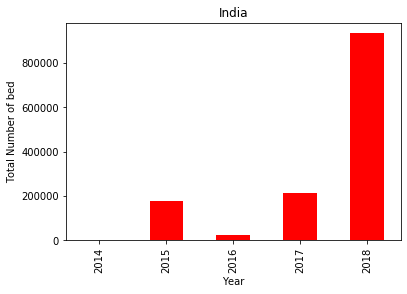

In [110]:
#Plotting the year and total number of beds in India
india[["Total_beds","year"]].groupby('year').sum().Total_beds.plot(kind="bar",color="red")
plt.title("India")
plt.ylabel("Total Number of bed")
plt.xlabel("Year")

**From above Graph we conclude that highest number of beds are in 2018 year in India**

Text(0.5, 1.0, 'USA')

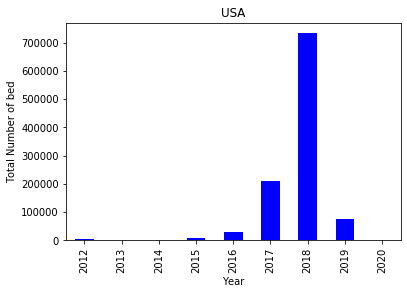

In [111]:
#Plotting Year and its count of beds in USA
Usa[["Total_beds","year"]].groupby('year').sum().Total_beds.plot(kind="bar",color="blue")
plt.ylabel("Total Number of bed")
plt.xlabel("Year")
plt.title("USA")

**From above Graph we conclude that highest number of beds are in 2018 year in USA**

Text(0.5, 1.0, 'India')

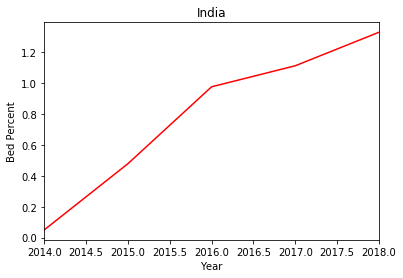

In [112]:
india[["beds_percent","year"]].groupby('year').sum().beds_percent.plot(kind="line",color="red")
plt.ylabel("Bed Percent")
plt.xlabel("Year")
plt.title("India")

**From above graph we can conclude that 2018 has overall highest bed percentage with respect to population in india**

Text(0.5, 1.0, 'USA')

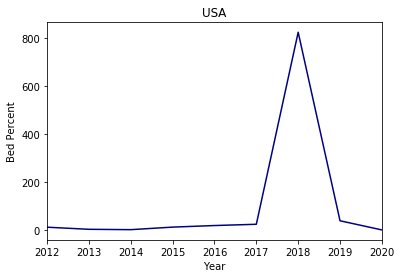

In [113]:
Usa[["beds_percent","year"]].groupby('year').sum().beds_percent.plot(kind="line",color="navy")
plt.ylabel("Bed Percent")
plt.xlabel("Year")
plt.title("USA")

**From above graph we can conclude that 2018 has overall highest bed percentage with respect to population in india**

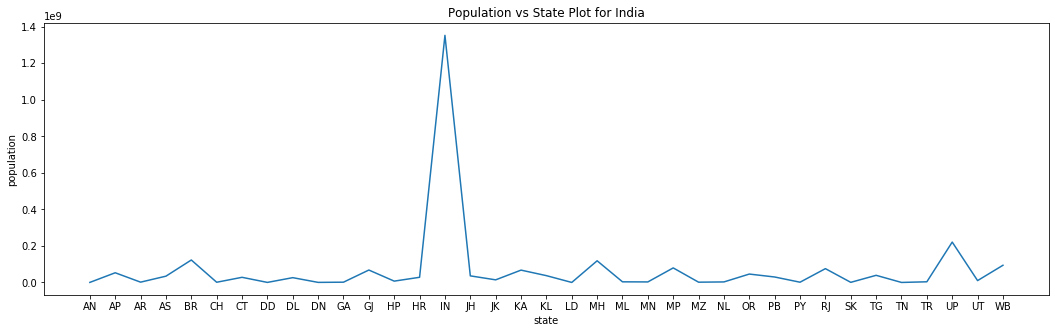

In [114]:
f, axes = plt.subplots(1,1,figsize=(18,5))
sns.lineplot(y="population", x= 'state', data=india )
plt.title('Population vs State Plot for India')
plt.show()

**From above graph we can conclude that IN has highest population in India**

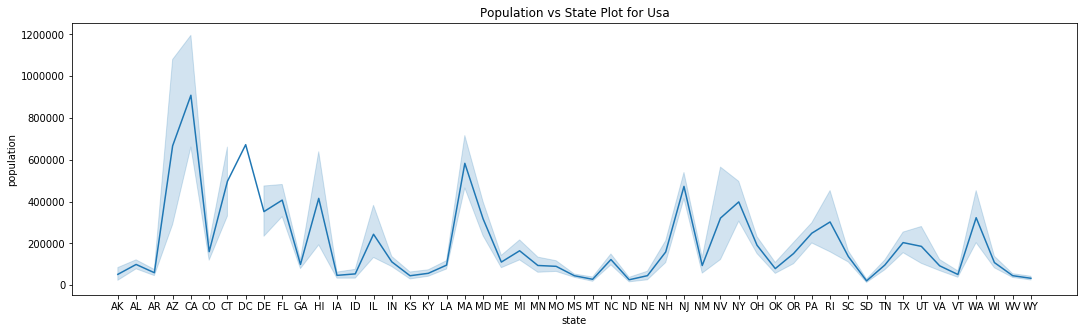

In [115]:
f, axes = plt.subplots(1,1,figsize=(18,5))
sns.lineplot(y="population", x= 'state', data=Usa )
plt.title('Population vs State Plot for Usa')
plt.show()

**From above graph we can conclude that IN has highest population in USA**

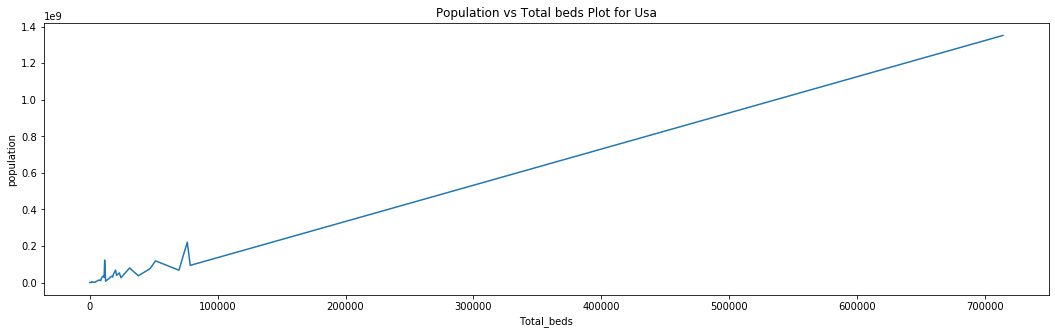

In [116]:
f, axes = plt.subplots(1,1,figsize=(18,5))
sns.lineplot(y="population", x= 'Total_beds', data=india )
plt.title('Population vs Total beds Plot for Usa')
plt.show()

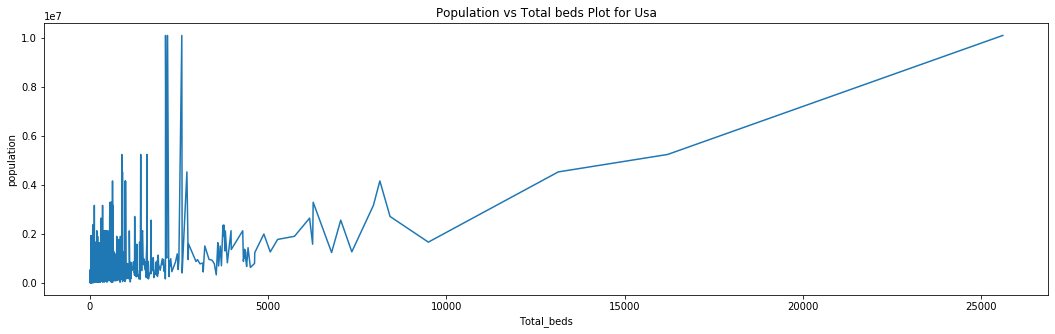

In [117]:
f, axes = plt.subplots(1,1,figsize=(18,5))
sns.lineplot(y="population", x= 'Total_beds', data=Usa )
plt.title('Population vs Total beds Plot for Usa')
plt.show()

Text(0, 0.5, 'Beds')

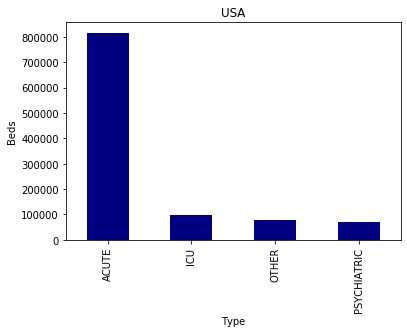

In [118]:
#Type vs Total beds
Usa[["Total_beds","type"]].groupby('type').sum().Total_beds.plot(kind="bar",color="navy")
plt.title("USA")
plt.xlabel("Type")
plt.ylabel("Beds")

**From Above graph we can say USA has most number of beds as Acute type**

Text(0.5, 1.0, 'Total Bed Avaliable India')

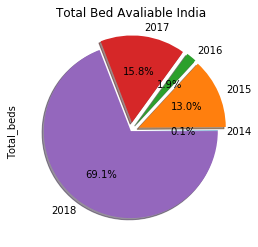

In [119]:
#Pie char for total beds available in india
temp=sum(india.Total_beds)
(india[["Total_beds","year"]].groupby('year').sum().Total_beds/temp).plot(kind="pie",shadow=True,autopct='%1.1f%%',radius=1,explode=[0,0.1,0.1,0.1,0])
plt.title("Total Bed Avaliable India",loc="center")

Text(0.5, 1.0, 'Types of Bed Avaliable USA')

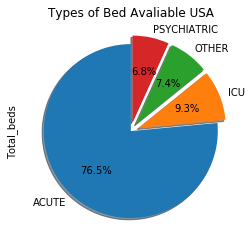

In [120]:
#Pie char for total beds available in USA
Usa[["Total_beds","type"]].groupby('type').sum().Total_beds.plot(kind="pie",shadow=True,autopct='%0.1f%%',radius=1,explode=[0,0.1,0.1,0.1],startangle=90)
plt.title("Types of Bed Avaliable USA")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

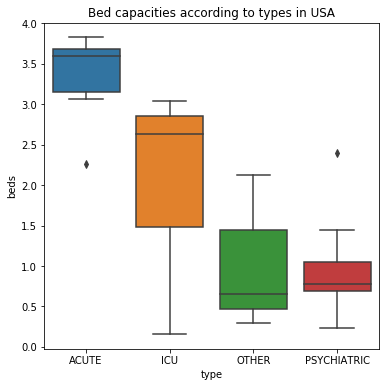

In [121]:
#Box plot for type and year
Value=Usa.groupby(['type','year'])['beds'].mean()
output=Value.reset_index()
plt.figure(figsize = (6, 6))
ax = sns.boxplot(x='type', y='beds', data=output)
ax.set_title('Bed capacities according to types in USA')
plt.xticks()

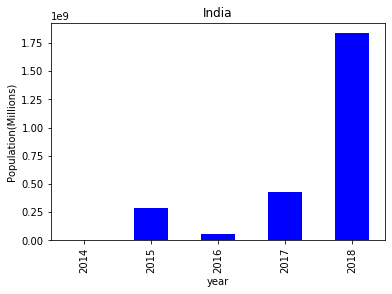

In [122]:
plt.title("India")
plt.xlabel("Year")
plt.ylabel("Population(Millions)")
india[["population","year"]].groupby('year').sum().population.plot(kind="bar",color="blue")

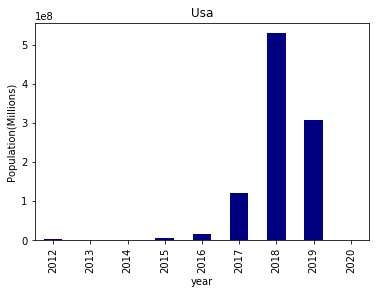

In [123]:
plt.title("Usa")
plt.xlabel("Year")
plt.ylabel("Population(Millions)")
Usa[["population","year"]].groupby('year').sum().population.plot(kind="bar",color="navy")

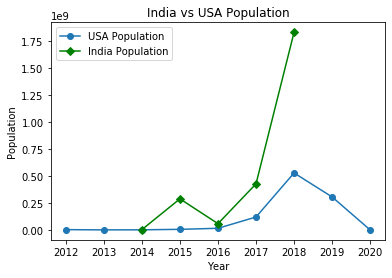

In [124]:
#India vs USA Population
plt.plot(sorted(Usa.year.unique()),Usa[["year","population"]].groupby('year').sum().population,'-o',label="USA Population")
plt.plot(sorted(india.year.unique()),india[["year","population"]].groupby('year').sum().population,'g-D',label="India Population")
plt.ylabel("Population")
plt.xlabel("Year")
plt.title("India vs USA Population")
plt.legend()

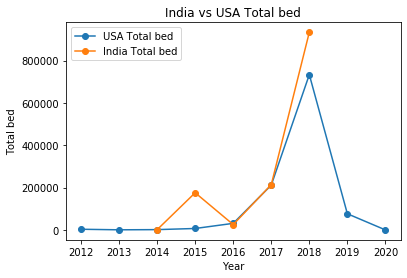

In [125]:
#India vs USA TOTAL BEDS
plt.plot(sorted(Usa.year.unique()),Usa[["year","Total_beds"]].groupby('year').sum().Total_beds,'-o',label="USA Total bed")
plt.plot(sorted(india.year.unique()),india[["year","Total_beds"]].groupby('year').sum().Total_beds,'-o',label="India Total bed")
plt.ylabel("Total bed")
plt.xlabel("Year")
plt.title("India vs USA Total bed")
plt.legend()

**At the end we successfully process the data and plot it then we compare the India and USA data with respect to total bed and year**